Meskerem Goshime, Machine Learning, Ensamble Models

University of Texas at Austin - Post-Graduate Program in Artificial Intelligence and Machine Learning

October 2025

Case Study: Diabetes Risk Prediction

Context:

Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients is growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

Individuals with diabetes face a risk of developing some secondary health issues such as heart diseases and nerve damage. Thus, early detection and treatment of diabetes can prevent complications and assist in reducing the risk of severe health problems. Even though it's incurable, it can be managed by treatment and medication.

Researchers at the Bio-Solutions lab want to get a better understanding of this disease among women and are planning to use machine learning models that will help them to identify patients who are at risk of diabetes.

You as a data scientist at Bio-Solutions have to build a classification model using a dataset collected by the "National Institute of Diabetes and Digestive and Kidney Diseases" consisting of several attributes that would help to identify whether a person is at risk of diabetes or not.

Objective:

The data-set aims to answer the following key questions:

What are the different factors that can help in identifying whether a person is at risk of diabetes or not?

Can we build a model to identify persons who are at risk of diabetes? What should be the metric of choice to evaluate such a model?

Attribute Information:

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skinfold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

Pedigree: Diabetes pedigree function - A function that scores likelihood of diabetes based on family history.

Age: Age in years

Class: Class variable (0: the person is not diabetic or 1: the person is diabetic)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/MyDrive/UTAIML_Projects/Ensamble Models - Optional/pima-indians-diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
Pedigree,0
Age,0
Class,0


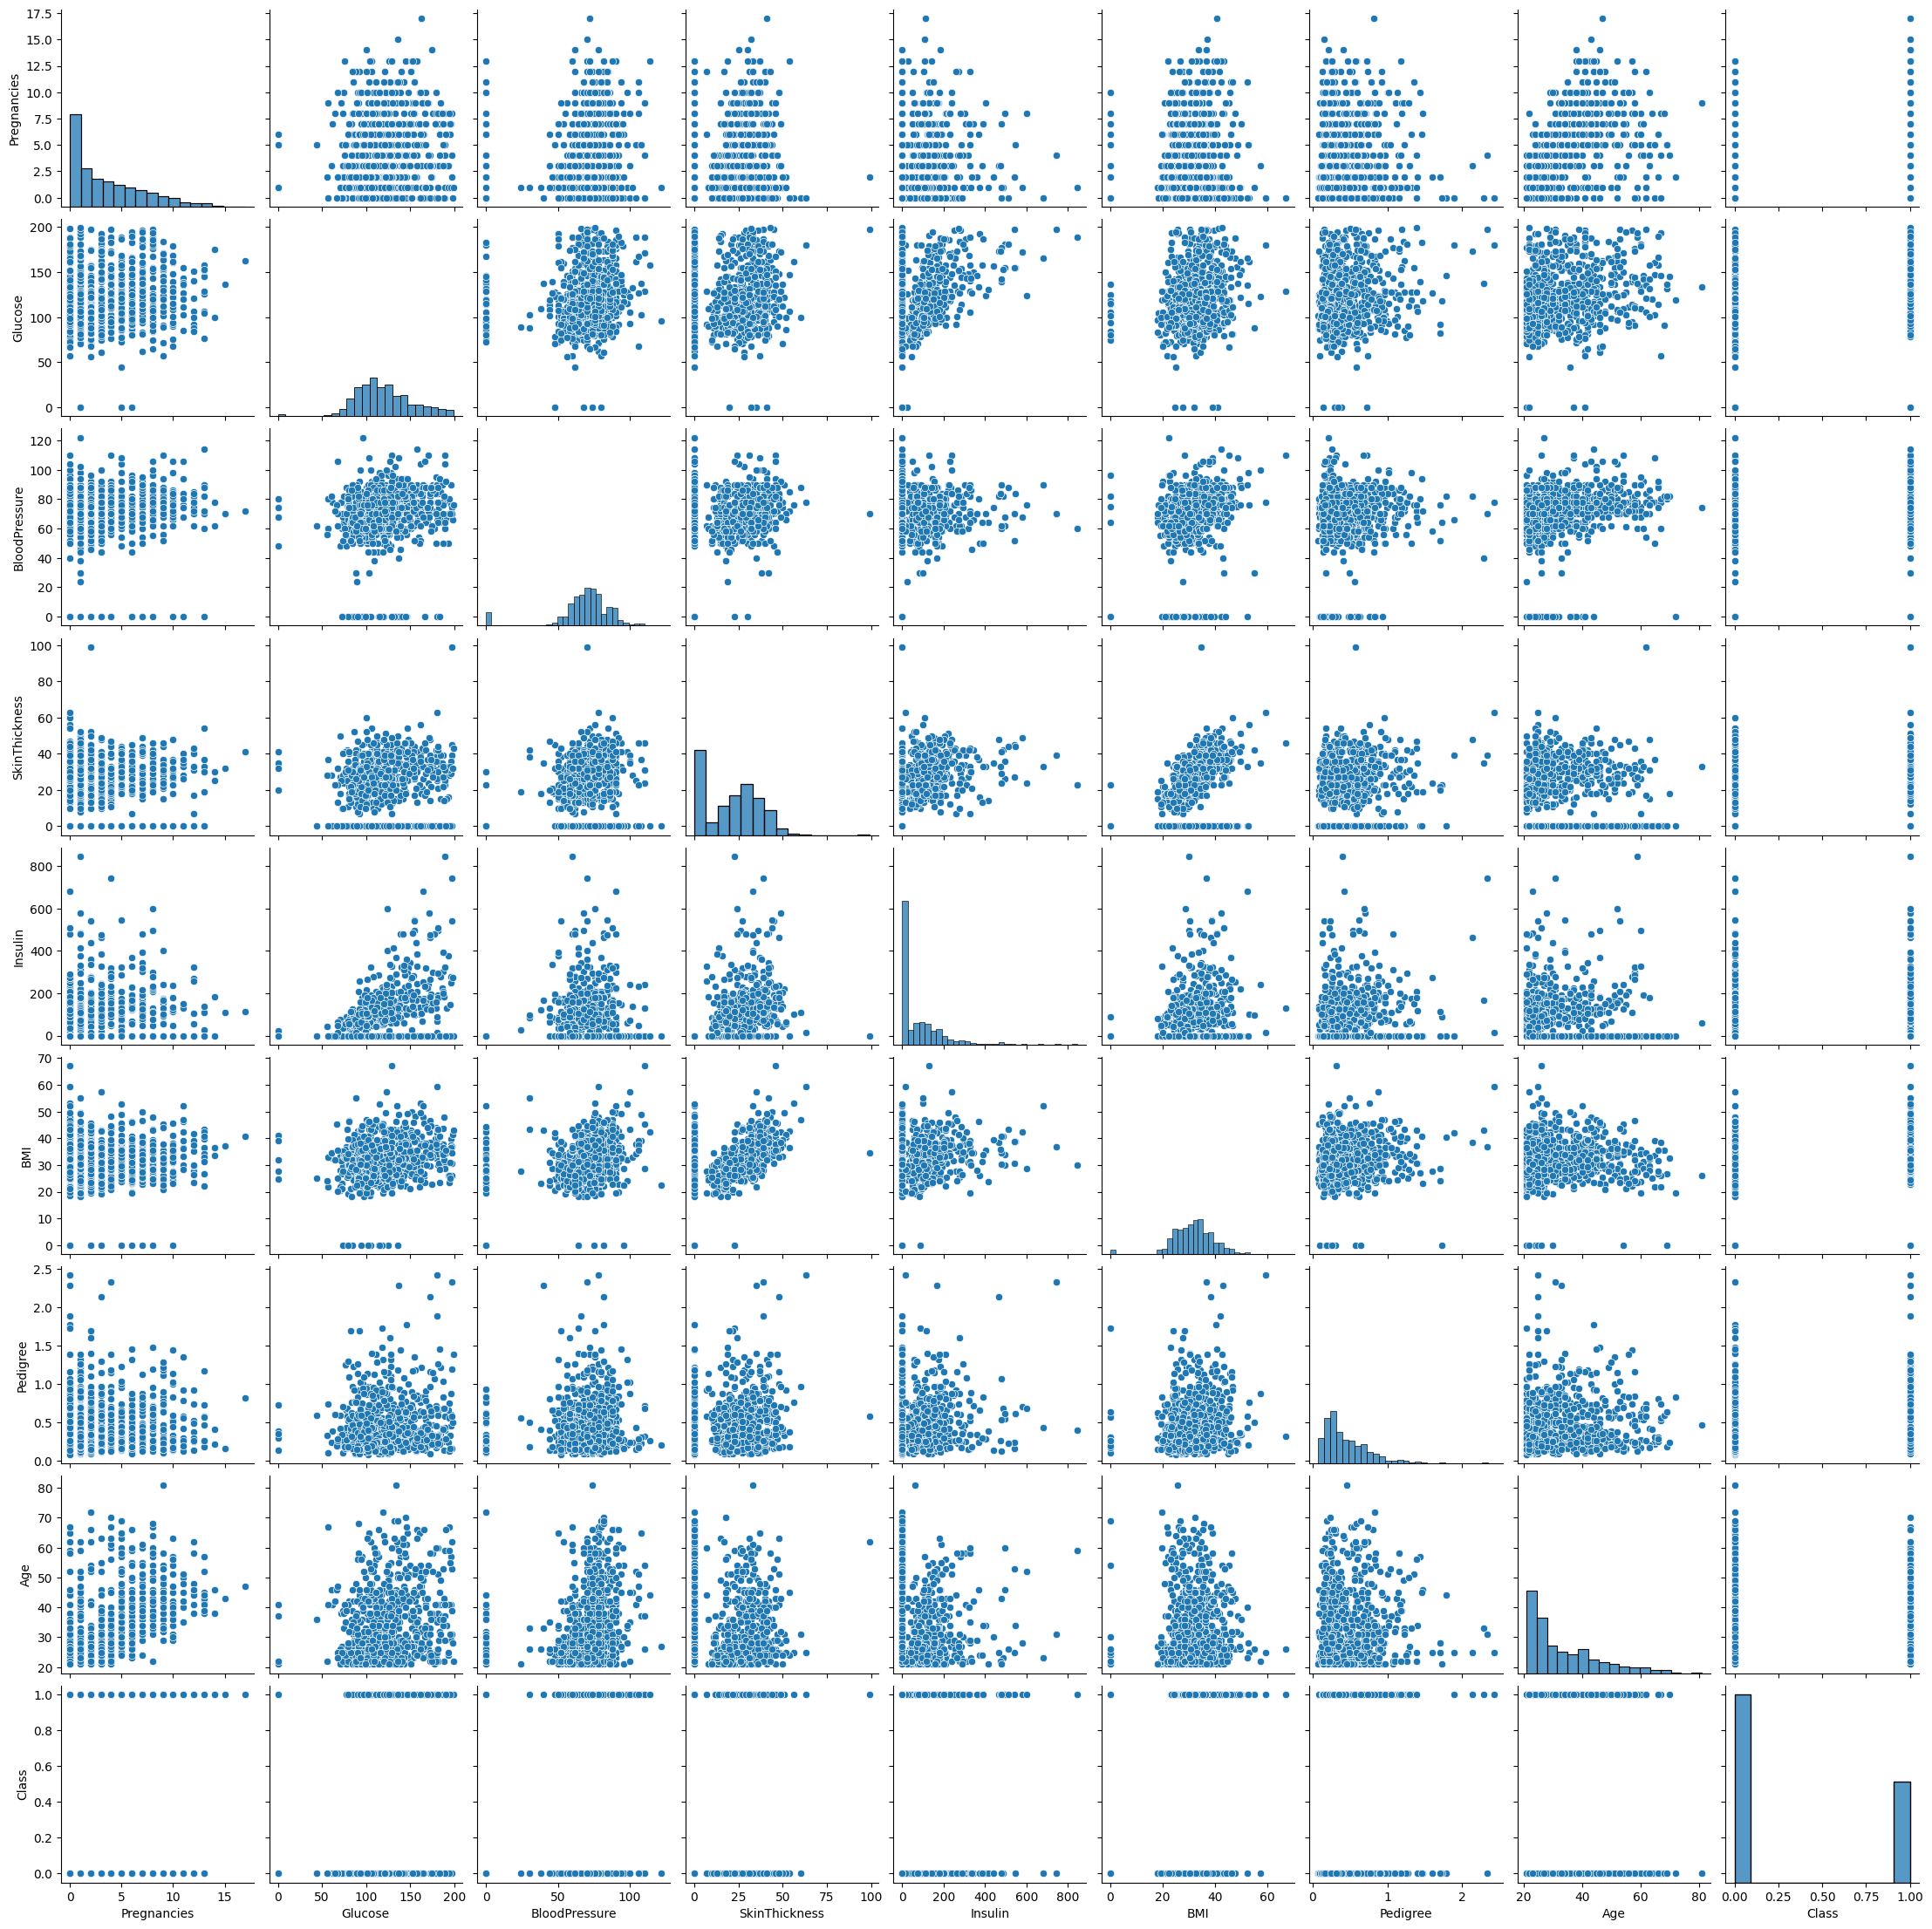

In [ ]:
sns.pairplot(data=df)

Exploring the Glucose and Insulin Columns

In [ ]:
df[df['Insulin']==0]['Insulin'].count()

np.int64(374)

In [ ]:
df[['Insulin', 'Glucose']].corr()

,Insulin,Glucose
Insulin,1.000000,0.331357
Glucose,0.331357,1.000000


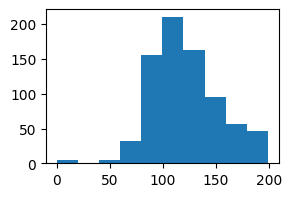

In [ ]:
plt.figure(figsize=(3,2))
plt.hist(df['Glucose'])
plt.show()

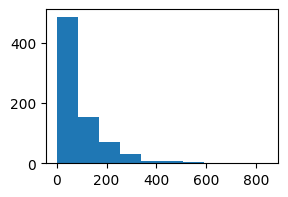

In [ ]:
plt.figure(figsize=(3,2))
plt.hist(df['Insulin'])
plt.show()

The Insulin column has 374 rows of 0's. A zero insulin value seem like an error, perhaps missing value. I will go ahead and remove this column.

The glucose column has 5 rows of 0's. A zero glucose value seem like an error, perhaps a missing value. I will go ahead and remove the 5 rows with 0 glucose value.

In [ ]:
df.drop('Insulin', axis=1, inplace=True)

In [ ]:
df.drop(df[df['Glucose']==0].index, axis=0, inplace=True)

In [ ]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,Pedigree,Age,Class
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1


In [ ]:
df[df['Glucose']==0]['Glucose'].count()

np.int64(0)

####Exploring 0 values in the BMI column

In [ ]:
df[df['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,Pedigree,Age,Class
9,8,125,96,0,0.0,0.232,54,1
49,7,105,0,0,0.0,0.305,24,0
60,2,84,0,0,0.0,0.304,21,0
81,2,74,0,0,0.0,0.102,22,0
145,0,102,75,23,0.0,0.572,21,0
371,0,118,64,23,0.0,1.731,21,0
426,0,94,0,0,0.0,0.256,25,0
494,3,80,0,0,0.0,0.174,22,0
522,6,114,0,0,0.0,0.189,26,0
684,5,136,82,0,0.0,0.640,69,0


There are 11 rows with 0 BMI values. I will have to remove these rows as it is impossible for a human to have 0 BMI.

In [ ]:
df.drop(df[df['BMI']==0].index, inplace=True)

In [ ]:
df[df['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,Pedigree,Age,Class


Exploring the blood pressure column

In [ ]:
df[df['BloodPressure']==0]['BloodPressure'].count()

np.int64(28)

In [ ]:
df[df['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,Pedigree,Age,Class
7,10,115,0,0,35.3,0.134,29,0
15,7,100,0,0,30.0,0.484,32,1
78,0,131,0,0,43.2,0.270,26,1
172,2,87,0,23,28.9,0.773,25,0
193,11,135,0,0,52.3,0.578,40,1
222,7,119,0,0,25.2,0.209,37,0
261,3,141,0,0,30.0,0.761,27,1
266,0,138,0,0,36.3,0.933,25,1
269,2,146,0,0,27.5,0.240,28,1
300,0,167,0,0,32.3,0.839,30,1


I will drop the 0 blood pressure rows.

In [ ]:
df.drop(df[df['BloodPressure']==0].index, inplace=True)

Exploring the Skin thickness column

In [ ]:
df[df['SkinThickness']==0]['SkinThickness'].count()

np.int64(192)

0 values in the skin thickness column, which I assume represent the null values, are too many to drop. Therefore, I will drop the skin thickness column instead.

In [ ]:
df.drop('SkinThickness', axis=1, inplace=True)
df.head(3)

,Pregnancies,Glucose,BloodPressure,BMI,Pedigree,Age,Class
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1


In [ ]:
#Describing the dataset after data cleaning
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,724.0,3.866022,3.362803,0.000,1.000,3.000,6.0000,17.00
Glucose,724.0,121.882597,30.750030,44.000,99.750,117.000,142.0000,199.00
BloodPressure,724.0,72.400552,12.379870,24.000,64.000,72.000,80.0000,122.00
BMI,724.0,32.467127,6.888941,18.200,27.500,32.400,36.6000,67.10
Pedigree,724.0,0.474765,0.332315,0.078,0.245,0.379,0.6275,2.42
Age,724.0,33.350829,11.765393,21.000,24.000,29.000,41.0000,81.00
Class,724.0,0.343923,0.475344,0.000,0.000,0.000,1.0000,1.00


###Exploratory Data Analysis

<Axes: xlabel='Class', ylabel='Glucose'>

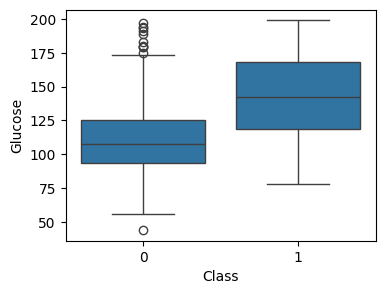

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df, x='Class', y='Glucose')

<Axes: xlabel='Class', ylabel='BloodPressure'>

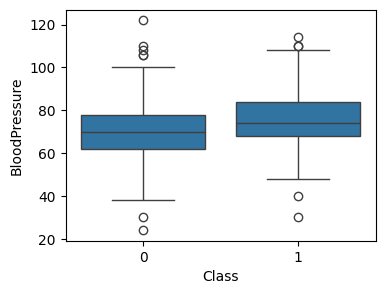

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df, x='Class', y='BloodPressure')

<Axes: xlabel='Class', ylabel='BMI'>

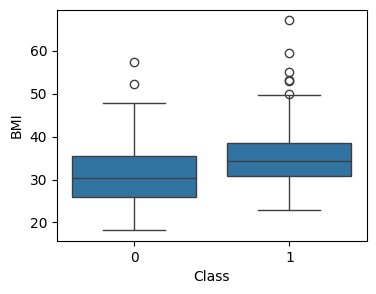

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df, x='Class', y='BMI')

<Axes: xlabel='Class', ylabel='Pedigree'>

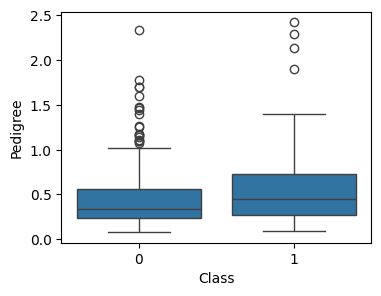

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df, x='Class', y='Pedigree')

<Axes: xlabel='Class', ylabel='Age'>

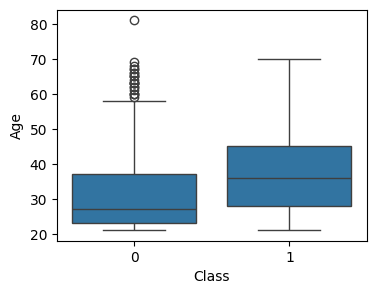

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df, x='Class', y='Age')

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,BMI,Pedigree,Age,Class
Pregnancies,1.000000,0.134915,0.209668,0.012342,-0.025996,0.557066,0.224417
Glucose,0.134915,1.000000,0.223331,0.223276,0.136630,0.263560,0.488384
BloodPressure,0.209668,0.223331,1.000000,0.287403,-0.000075,0.324897,0.166703
BMI,0.012342,0.223276,0.287403,1.000000,0.154858,0.020835,0.299375
Pedigree,-0.025996,0.136630,-0.000075,0.154858,1.000000,0.023098,0.184947
Age,0.557066,0.263560,0.324897,0.020835,0.023098,1.000000,0.245741
Class,0.224417,0.488384,0.166703,0.299375,0.184947,0.245741,1.000000


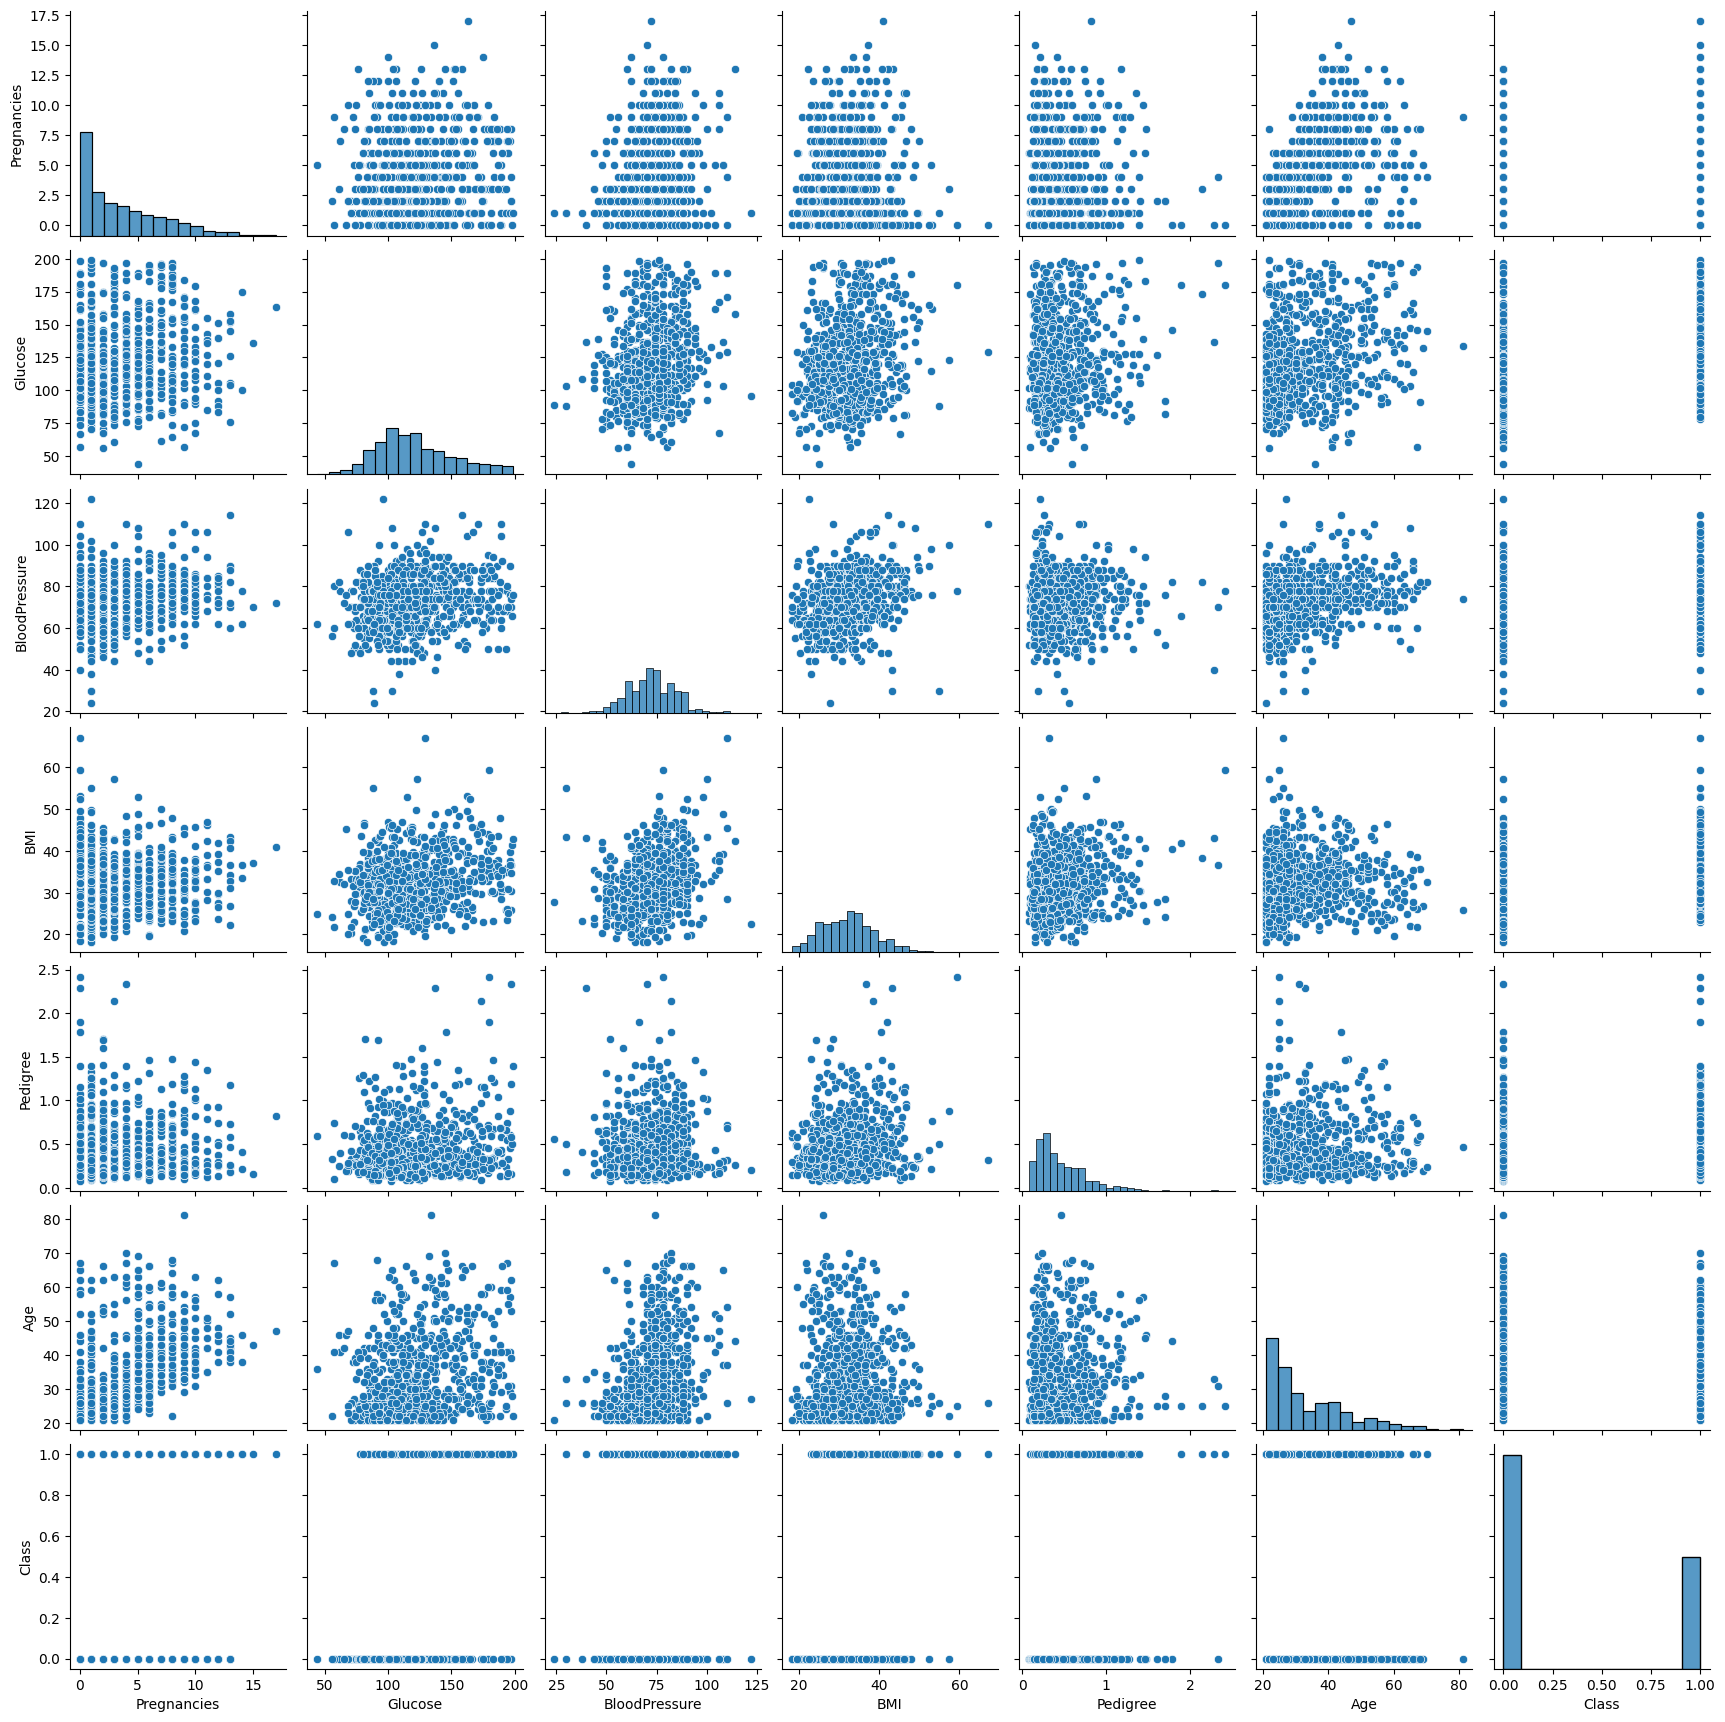

In [ ]:
sns.pairplot(data=df)

In [ ]:
df['Class'].value_counts(normalize=True)


,proportion
Class,
0,0.656077
1,0.343923


Correlation with the target variable is in the following order:
- Glucose
- BMI
- Age
- Pregnancies
- Pedigree
- Blood Pressure





In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

##Model Building

Defining Functions

In [ ]:
#function to calculate scores
def scores(y_train, y_test, y_pred_train, y_pred_test):

    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_precision = precision_score(y_test, y_pred_test)
    train_precision = precision_score(y_train, y_pred_train)
    test_recall = recall_score(y_test, y_pred_test)
    train_recall = recall_score(y_train, y_pred_train)
    test_f1 = f1_score(y_test, y_pred_test)
    train_f1 = f1_score(y_train, y_pred_train)
    scores = {'test_accuacy': test_accuracy, 'train_accuracy': train_accuracy, 'test_precision': test_precision, 'train_precision': train_precision, 'test_recall': test_recall, 'train_recall': train_recall, 'test_f1': test_f1, 'train_f1': train_f1}
    scores = pd.DataFrame(scores, index=[0])
    return scores

###Random Forest Model

In [ ]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

scores(y_train, y_test, y_pred_train, y_pred_test)

,test_accuacy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.703448,1.0,0.563636,1.0,0.62,1.0,0.590476,1.0


Random Forest Tuned - best f1

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],         # Fewer trees are fine for small data
    'max_depth': [None, 2, 5, 10, 15],         # Limit depth to avoid overfitting
    'min_samples_split': [2, 5, 10],        # Increase to make trees more conservative
    'min_samples_leaf': [1, 2, 4],          # Avoid very small leaves
    'max_features': ['sqrt', 'log2'],       # Common defaults that help decorrelate trees
    'bootstrap': [True],                    # Keep default bootstrapping
    'class_weight': [None, 'balanced']      # Test this if your classes are imbalanced
}

In [ ]:
rf2 = RandomForestClassifier(random_state=42)


In [ ]:
# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=rf2,
    param_grid=param_grid,
    scoring='f1',          # choose metric (e.g. 'accuracy', 'f1', 'roc_auc')
    cv=4,                  # 5-fold cross-validation
    n_jobs=-1,             # use all CPU cores
    verbose=2,
    error_score='raise'
)

In [ ]:

# Fit the grid search
grid_search.fit(X_train, y_train)

# Show best parameters
print("Best Parameters:")
print(grid_search.best_params_)


Fitting 4 folds for each of 540 candidates, totalling 2160 fits
Best Parameters:
{'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
rf_tuned_f1 = RandomForestClassifier(random_state=42, class_weight='balanced', max_depth=4, max_leaf_nodes=10, min_samples_leaf=5)
rf_tuned_f1.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, max_leaf_nodes=10,
                       min_samples_leaf=5, random_state=42)

In [ ]:
y_pred_train = rf_tuned_f1.predict(X_train)
y_pred_test = rf_tuned_f1.predict(X_test)

scores(y_train, y_test, y_pred_train, y_pred_test)

,test_accuacy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.696552,0.83247,0.542857,0.710744,0.76,0.864322,0.633333,0.780045


Random forest tuned - best recall

In [ ]:
rf3 = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf3,
    param_grid=param_grid,
    scoring='recall',          # choose metric (e.g. 'accuracy', 'f1', 'roc_auc')
    cv=4,                  # 5-fold cross-validation
    n_jobs=-1,             # use all CPU cores
    verbose=2,
    error_score='raise'
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Show best parameters
print("Best Parameters:")
print(grid_search.best_params_)

Fitting 4 folds for each of 540 candidates, totalling 2160 fits
Best Parameters:
{'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
rf_tuned_recall = RandomForestClassifier(random_state=42, bootstrap=True, class_weight='balanced', max_depth=2, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=200)
rf_tuned_recall.fit(X_train, y_train)

y_pred_train = rf_tuned_recall.predict(X_train)
y_pred_test = rf_tuned_recall.predict(X_test)

scores(y_train, y_test, y_pred_train, y_pred_test)

,test_accuacy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.655172,0.791019,0.5,0.657258,0.76,0.819095,0.603175,0.729306


rf_tuned_f1 performs better than rf_tuned_recall.

###Bagging Model

In [ ]:
bg = BaggingClassifier()
bg.fit(X_train, y_train)

y_pred_train = bg.predict(X_train)
y_pred_test = bg.predict(X_test)

scores(y_train, y_test, y_pred_train, y_pred_test)

,test_accuacy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.710345,0.970639,0.574074,0.978947,0.62,0.934673,0.596154,0.956298


###Tuned bagging model

In [ ]:
#base_tree = DecisionTreeClassifier(random_state=42)
bag_model = BaggingClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.6, 0.8, 1.0],
    'max_features': [0.6, 0.8, 1.0]
}

#['bootstrap', 'bootstrap_features', 'estimator', 'max_features', 'max_samples', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].


grid_search = GridSearchCV(
    estimator=bag_model,
    param_grid=param_grid,
    scoring='recall',       # or 'accuracy', 'roc_auc'
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters:")
print(grid_search.best_params_)

best_bag = grid_search.best_estimator_
best_bag.fit(X_train, y_train)

y_pred_train = best_bag.predict(X_train)
y_pred_test = best_bag.predict(X_test)

scores(y_train, y_test, y_pred_train, y_pred_test)

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'class_weight'

###Decision Tree Model

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

scores(y_train, y_test, y_pred_train, y_pred_test)


,test_accuacy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.668966,1.0,0.519231,1.0,0.54,1.0,0.529412,1.0


c. Initialize the model with an initial prediction for all observations.
A. Calculate the residual for each observation.
B. Update all predictions using previous probabilities and new output values.
D. Repeat steps by creating a new tree until the maximum number of estimators is reached.
E. Build a tree and calculate the output value for each leaf node.


